In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


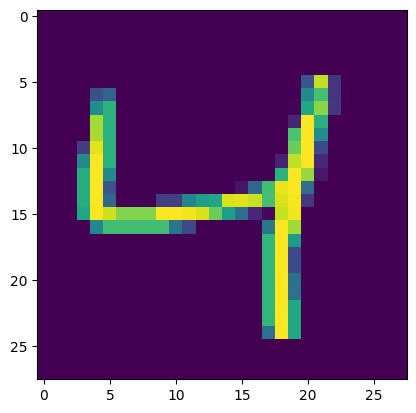

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])

In [4]:
x_train=x_train/255
x_test=x_test/255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))#32 nodes
model.add(Dense(10,activation='softmax'))
#The Flatten layer is used to flatten the 28x28 input images into a 1D array or vector of size 784 (28 * 28)
#128 nodes (or neurons) to the model by relu
#adds another fully connected layer with 32 nodes and uses ReLU activation
#The final layer added to the model is another fully connected layer with 10 nodes.
# This is the output layer, and it uses the softmax activation function.
# In a classification task like MNIST digit recognition, softmax is commonly used to produce probability distributions over the 10 possible classes (digits 0 through 9).
# It assigns a probability to each class, and the class with the highest probability is the predicted output.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2820 - accuracy: 0.9175 - val_loss: 0.1525 - val_accuracy: 0.9542
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1192 - accuracy: 0.9653 - val_loss: 0.1093 - val_accuracy: 0.9672
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0826 - accuracy: 0.9747 - val_loss: 0.1212 - val_accuracy: 0.9616
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0609 - accuracy: 0.9808 - val_loss: 0.1173 - val_accuracy: 0.9662
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.1014 - val_accuracy: 0.9684
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.1025 - val_accuracy: 0.9719
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0317 - accuracy: 0.9895 - val_loss: 0.1210 - val_accuracy:

In [26]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [27]:
y_pred=y_prob.argmax(axis=1)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9741

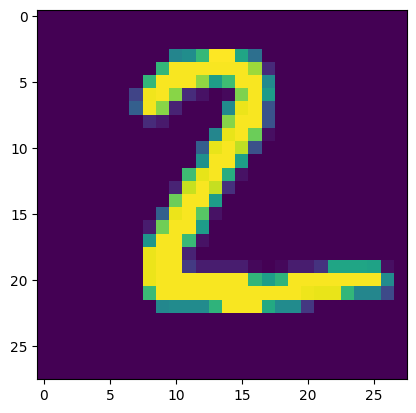

In [29]:
plt.imshow(x_test[1])

In [30]:
model.predict(x_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([1])